In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dropping 'customer ID' as it is unique to all customers and does not contribute anything to the final churn

In [5]:
df.drop(['customerID'],axis=1,inplace=True)

Checking if there are any null values in the dataset

In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Checking if there are any NAN values in the dataset

In [7]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges,errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
# dropping all tenure rows with 0 values
df.drop(labels=df[df['tenure']==0].index,axis=0,inplace=True)
df[df['tenure']==0].index

Int64Index([], dtype='int64')

In [11]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Label encoding the Churn column (0 = No, 1 = Yes)

In [12]:
from sklearn import preprocessing
LE = preprocessing.LabelBinarizer()
df['Churn'] = LE.fit_transform(list(df['Churn']))

Checking out how many churned and not churned

Churned percentage is 26.58
Not churned percentage is 73.42


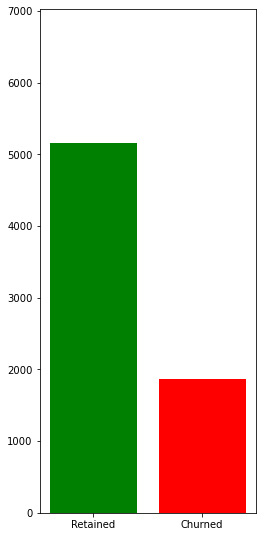

In [13]:
churned = round((df['Churn'].value_counts()[1]/df.shape[0])*100,2)
notchurned = round((df['Churn'].value_counts()[0]/df.shape[0])*100,2)
print(f"Churned percentage is {churned}")
print(f"Not churned percentage is {notchurned}")
plotter = {'Retained':df['Churn'].value_counts()[0],'Churned':df['Churn'].value_counts()[1]}
fig = plt.figure(figsize=(3,7))
axis = fig.add_axes([0,0,1,1])
axis.bar(list(plotter.keys()), list(plotter.values()),color=['green','red']);
axis.set_ylim(0,df.shape[0])
plt.show()
# Adding a semi colon in the end of plot statement will suppress unwanted output from the plot

Splitting all the categorical and continuous variables

In [14]:
categorical = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
continuous = ['tenure','MonthlyCharges','TotalCharges']

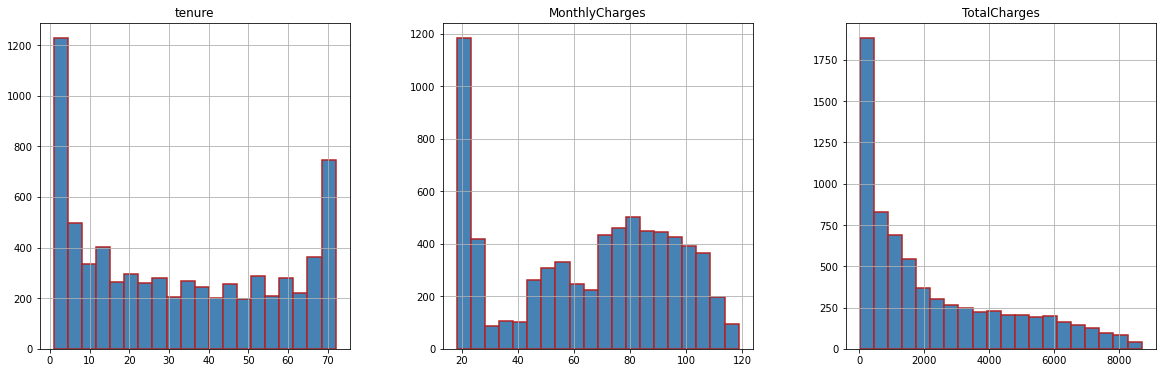

In [15]:
df[continuous].hist(figsize=(20, 6),
                          bins=20,
                          layout=(1, 3),
                          color='steelblue',
                          edgecolor='firebrick',
                          linewidth=1.5);

Plotting categorical values in histgrams

In [16]:
def plot_categorical(feature):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    sns.countplot(x=feature,
                  hue='Churn',
                  data=df,
                  ax=ax1)
    ax1.set_ylabel('Count')
    ax1.legend(labels=['Retained', 'Churned'])

    sns.barplot(x=feature,
                y='Churn',
                data=df,
                ax=ax2)
    ax2.set_ylabel('Churn rate')


    plt.tight_layout()

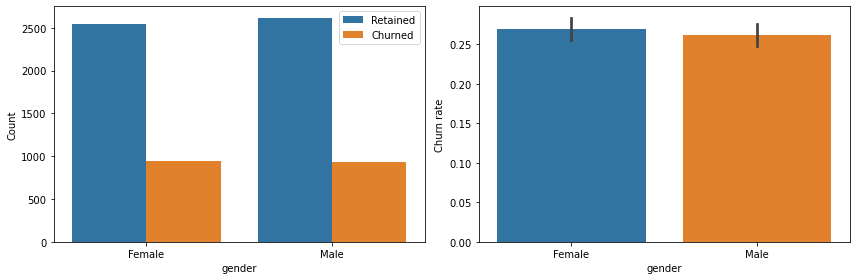

In [17]:
plot_categorical('gender')

Analysis of Gender variable

The data set has almost equal number of Male and Female customers, and both genders are equally likely to Churn or Retain.
The gender variable does not contribute much in determining / predicting if a customer will churn or not.

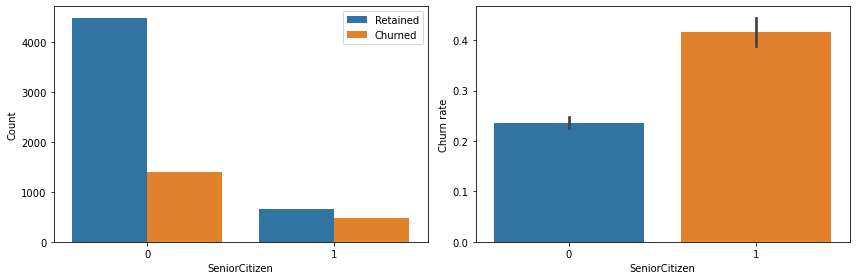

In [18]:
plot_categorical('SeniorCitizen')

Analysis of Senior Citizens variable

The majority of customers are not Senior Citizens. The majority of Senior Citizens are likely to retain, while a slightly less number will considern to Churn.

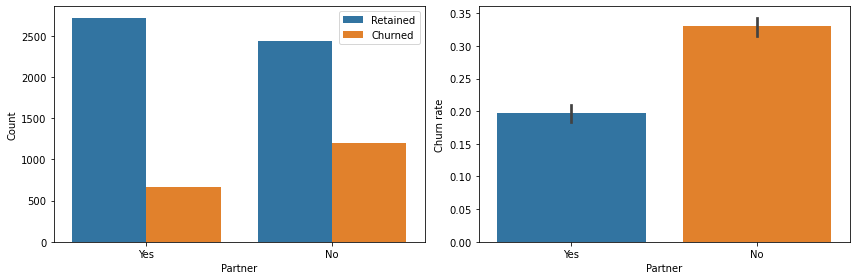

In [19]:
plot_categorical('Partner')

Analysis of Partner

There is a almost equal number of customers who have and do not have partners. There is not significant distinction of churn rate between customers who have partners and those who do not.

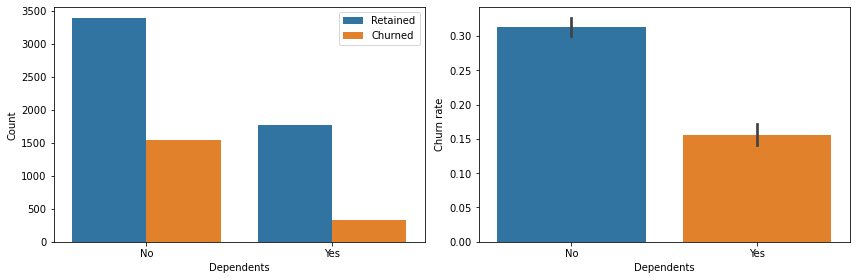

In [20]:
plot_categorical('Dependents')

Analysis of Dependents

The majority of customers do NOT have any dependents. Majority of people regardless if they have dependents are more likely to Retain then churn.

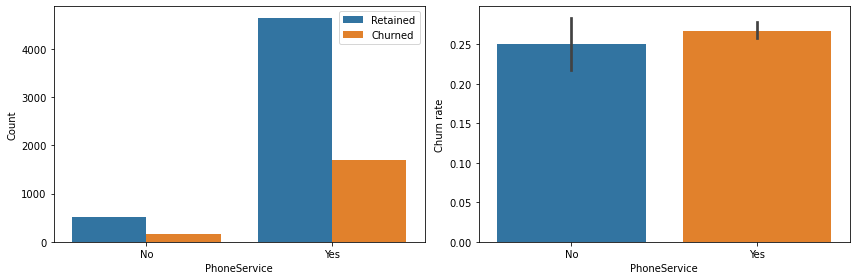

In [21]:
plot_categorical('PhoneService')

Analysis of Phone Service

The majority of customers have a phone service. Those who do not are slightly more likely to Retain then churn. The customers who have phone service are most likely going to Retain then Churn.

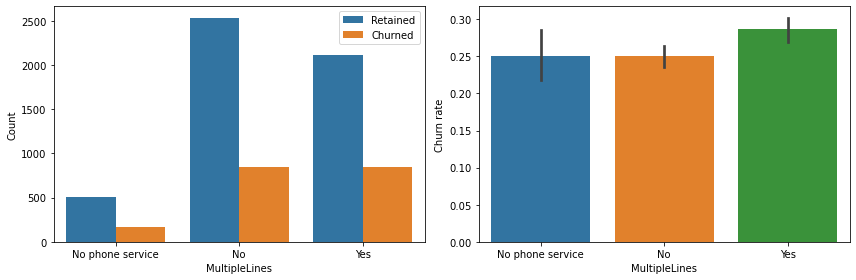

In [22]:
plot_categorical('MultipleLines')

Analysis of Multiple Lines

The number of customers who have multiple lines is marginarlly lesser than number of customers who have no multiple lines (by almost 300). The customers with a single line are in the minority.

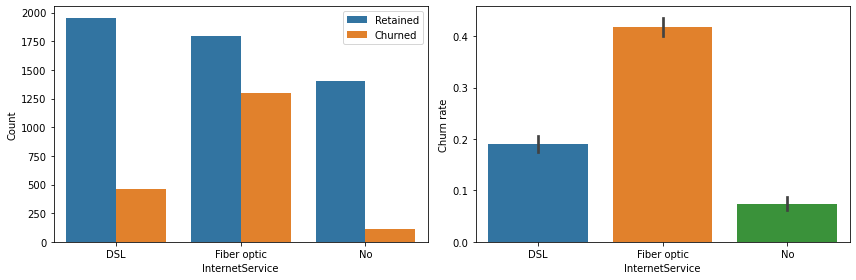

In [23]:
plot_categorical('InternetService')

Analysis of Internet Service

Customers having fiber optic or DSL service is considerably higher than those who have no internet service.

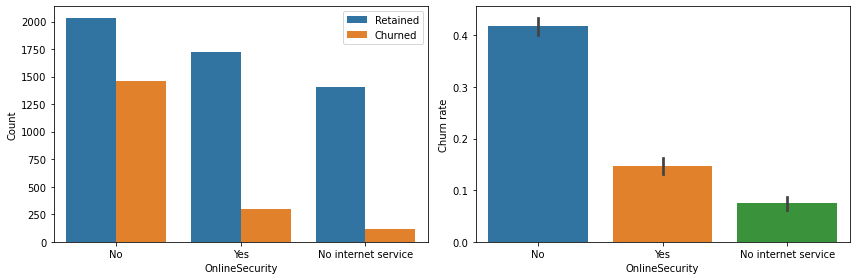

In [24]:
plot_categorical('OnlineSecurity')

Analysis of Online Security

The number of customers who DO NOT have some sort of online security is almost 1500 more than those who have online security.
More people with online security are most likely to Retain than Churn.

<AxesSubplot:title={'center':'OnlineBackup'}, xlabel='OnlineBackup', ylabel='count'>

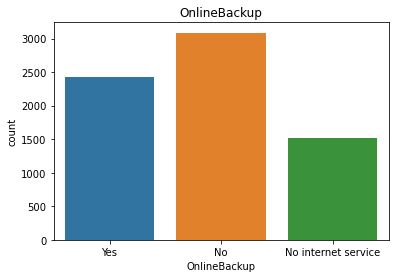

In [25]:
plt.title('OnlineBackup')
sns.countplot(data=df, x=df['OnlineBackup'])

Analysis of Online Backup

There is almost equal balance between the number of customers who have online backup compared to those who do not.

<AxesSubplot:title={'center':'DeviceProtection'}, xlabel='DeviceProtection', ylabel='count'>

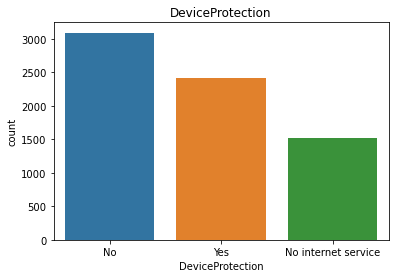

In [26]:
plt.title('DeviceProtection')
sns.countplot(data=df, x=df['DeviceProtection'])

There is almost 3000 people with no Device Protection and 2250 customers with some sort of device prediction (which is similar to the results seen in online security)

<AxesSubplot:title={'center':'TechSupport'}, xlabel='TechSupport', ylabel='count'>

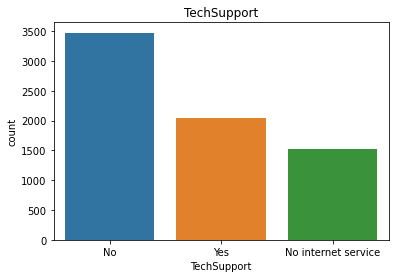

In [27]:
plt.title('TechSupport')
sns.countplot(data=df, x=df['TechSupport'])

The results are similar to Online Security and Device Protection. There are about 1250 people more who have no tech support compared to those who have tech support.


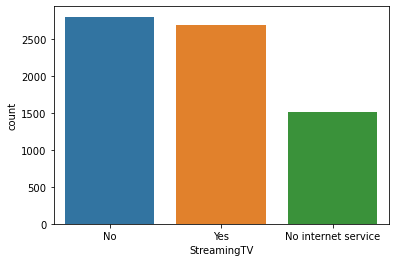

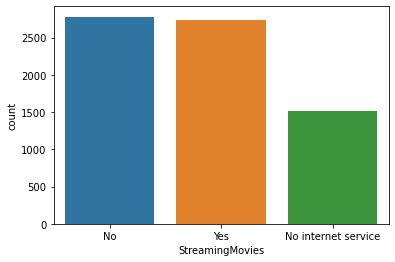

<AxesSubplot:xlabel='Contract', ylabel='count'>

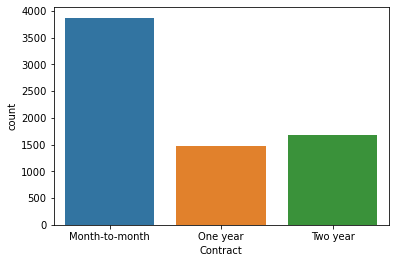

In [28]:
sns.countplot(data=df, x=df['StreamingTV'])
plt.show()
sns.countplot(data=df, x=df['StreamingMovies'])
plt.show()
sns.countplot(data=df, x=df['Contract'])

Almost a equal number of people stream movies and TV compared to those who dont. Also, most people prefer to take monthly subscriptions compared to yearly or biyearly subscriptions.

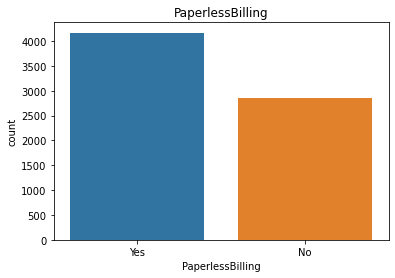

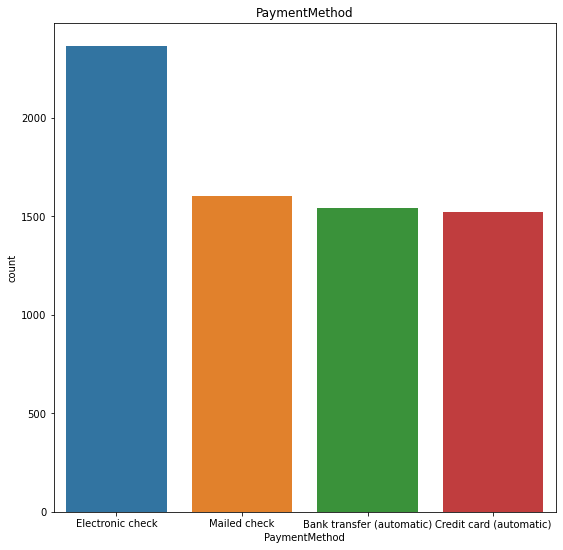

In [29]:
plt.title('PaperlessBilling')
sns.countplot(data=df, x=df['PaperlessBilling'])
plt.show()

plt.figure(figsize=(9,9))
plt.title('PaymentMethod')
sns.countplot(data=df, x=df['PaymentMethod'])
plt.show()

The number of people using paperless billing is must higher than those who dont (can also be observed by the Payment Method table, where msot people prefer Electronic Check, Bank or Credit Card Transfer).

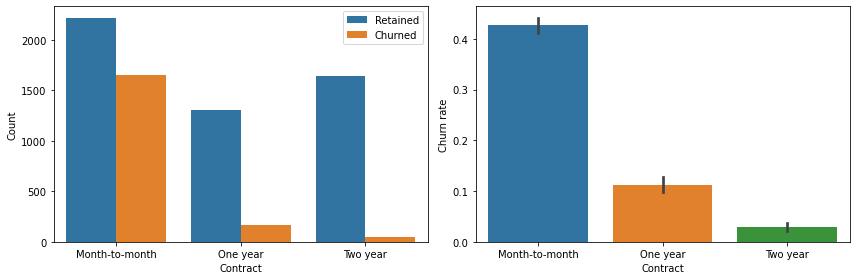

In [30]:
plot_categorical('Contract')

Analysis of Contract

Here, we can see that people with monthly subscriptions are more likely to Churn, while those who have biyearly or yearly subscriptions are less likely to Churn. \
Most people with yearly or biyearly subscriptions will most likely Retain than Churn. 

### Data Preprocessing

Listing out the keys in each column to determine best approach for preprocessing.

In [31]:
for category in categorical:
    print(category, " : ", set(list(df[category])))

gender  :  {'Male', 'Female'}
SeniorCitizen  :  {0, 1}
Partner  :  {'No', 'Yes'}
Dependents  :  {'No', 'Yes'}
PhoneService  :  {'No', 'Yes'}
MultipleLines  :  {'No', 'No phone service', 'Yes'}
InternetService  :  {'No', 'DSL', 'Fiber optic'}
OnlineSecurity  :  {'No', 'No internet service', 'Yes'}
OnlineBackup  :  {'No', 'No internet service', 'Yes'}
DeviceProtection  :  {'No', 'No internet service', 'Yes'}
TechSupport  :  {'No', 'No internet service', 'Yes'}
StreamingTV  :  {'No', 'No internet service', 'Yes'}
StreamingMovies  :  {'No', 'No internet service', 'Yes'}
Contract  :  {'Month-to-month', 'One year', 'Two year'}
PaperlessBilling  :  {'No', 'Yes'}
PaymentMethod  :  {'Bank transfer (automatic)', 'Electronic check', 'Credit card (automatic)', 'Mailed check'}


Data Preprocessing

Perform encoding for the categorical variables in the data frame

In [32]:
from sklearn import preprocessing
LE = preprocessing.LabelBinarizer()
df['gender'] = LE.fit_transform(list(df['gender']))
df['SeniorCitizen'] = LE.fit_transform(list(df['SeniorCitizen']))
df['Partner'] = LE.fit_transform(list(df['Partner']))
df['Dependents'] = LE.fit_transform(list(df['Dependents']))
df['PhoneService'] = LE.fit_transform(list(df['PhoneService']))
df['PaperlessBilling'] = LE.fit_transform(list(df['PaperlessBilling']))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [33]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
df['MultipleLines']= OE.fit_transform(df.MultipleLines.values.reshape(-1,1))
df['InternetService'] = OE.fit_transform(df.InternetService.values.reshape(-1,1))
df['OnlineSecurity'] = OE.fit_transform(df.OnlineSecurity.values.reshape(-1,1))
df['OnlineBackup']=OE.fit_transform(df.OnlineBackup.values.reshape(-1,1))
df['DeviceProtection'] = OE.fit_transform(df.DeviceProtection.values.reshape(-1,1))
df['TechSupport'] = OE.fit_transform(df.TechSupport.values.reshape(-1,1))
df['StreamingTV']= OE.fit_transform(df.StreamingTV.values.reshape(-1,1))
df['StreamingMovies'] = OE.fit_transform(df.StreamingMovies.values.reshape(-1,1))
df['Contract']=OE.fit_transform(df.Contract.values.reshape(-1,1))
df['PaymentMethod']= OE.fit_transform(df.PaymentMethod.values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1,2.0,29.85,29.85,0
1,1,0,0,0,34,1,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0,3.0,56.95,1889.50,0
2,1,0,0,0,2,1,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1,3.0,53.85,108.15,1
3,1,0,0,0,45,0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0,0.0,42.30,1840.75,0
4,0,0,0,0,2,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1,3.0,84.80,1990.50,0
7039,0,0,1,1,72,1,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1,1.0,103.20,7362.90,0
7040,0,0,1,1,11,0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,29.60,346.45,0
7041,1,1,1,0,4,1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,74.40,306.60,1


Check the data types of all values (categorical) in each column to determine if any conversion have to be made.

This is done because performing statisticaly measures on larger than required data types and non numerical types (ex : object) 
can give false results when calculating statistical results

In [34]:
# Check the data types of all values in each column to determine if any conversion have to be made.
print(df.dtypes)

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling      int64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


Because of encoding done earlier, all categorical variables are now represented as integer data tyeps. 

Now, we check the max / min range of these variables and perform data compression wherever appropriate

In [35]:
ii8 = np.iinfo(np.int8)
ii16 = np.iinfo(np.int16)
ii32 = np.iinfo(np.int32)
ii64 = np.iinfo(np.int64)

print(ii8.max)
for category in categorical:
    max_value = df[category].max()
    min_value = df[category].min()

    if max_value < ii8.max:
        print("Converting data types of ", category, " to int8 as max value is only : ", max_value)
        df[category] = df[category].astype(np.int8)

    elif max_value < ii16.max:
        print("Converting data types of ", category, " to int16 as max value is only : ", max_value)
        df[category] = df[category].astype(np.int16)

    elif max_value < ii32.max:
        print("Converting data types of ", category, " to int32 as max value is only : ", max_value)
        df[category] = df[category].astype(np.int32)

    elif max_value < ii64.max:
        print("Converting data types of ", category, " to int64 as max value is only : ", max_value)
        df[category] = df[category].astype(np.int64)

print("Data types after performing conversions:")
df.dtypes

127
Converting data types of  gender  to int8 as max value is only :  1
Converting data types of  SeniorCitizen  to int8 as max value is only :  1
Converting data types of  Partner  to int8 as max value is only :  1
Converting data types of  Dependents  to int8 as max value is only :  1
Converting data types of  PhoneService  to int8 as max value is only :  1
Converting data types of  MultipleLines  to int8 as max value is only :  2.0
Converting data types of  InternetService  to int8 as max value is only :  2.0
Converting data types of  OnlineSecurity  to int8 as max value is only :  2.0
Converting data types of  OnlineBackup  to int8 as max value is only :  2.0
Converting data types of  DeviceProtection  to int8 as max value is only :  2.0
Converting data types of  TechSupport  to int8 as max value is only :  2.0
Converting data types of  StreamingTV  to int8 as max value is only :  2.0
Converting data types of  StreamingMovies  to int8 as max value is only :  2.0
Converting data typ

gender                 int8
SeniorCitizen          int8
Partner                int8
Dependents             int8
tenure                int64
PhoneService           int8
MultipleLines          int8
InternetService        int8
OnlineSecurity         int8
OnlineBackup           int8
DeviceProtection       int8
TechSupport            int8
StreamingTV            int8
StreamingMovies        int8
Contract               int8
PaperlessBilling       int8
PaymentMethod          int8
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

We can observe that TotalCharges has a data type of float64. We check the range of values it holds to determine if casting to a 
smaller type (float16, for example) is possible.

In [36]:
f16 = np.finfo(np.float16)
f32 = np.finfo(np.float32)
f64 = np.finfo(np.float64)

category = 'TotalCharges'

max_value = df[category].max()
min_value = df[category].min()


if max_value < f16.max:
    print("Converting data types of ", category, " to f16 as max value is only : ", max_value)
    df[category] = df[category].astype(np.float16)

elif max_value < f32.max:
    print("Converting data types of ", category, " to f32 as max value is only : ", max_value)
    df[category] = df[category].astype(np.float32)

elif max_value < f64.max:
    print("Converting data types of ", category, " to f64 as max value is only : ", max_value)
    df[category] = df[category].astype(np.float64)

print("New data type of ", category, " : ", df[category].dtype)

Converting data types of  TotalCharges  to f16 as max value is only :  8684.8
New data type of  TotalCharges  :  float16


## Plotting 

<AxesSubplot:>

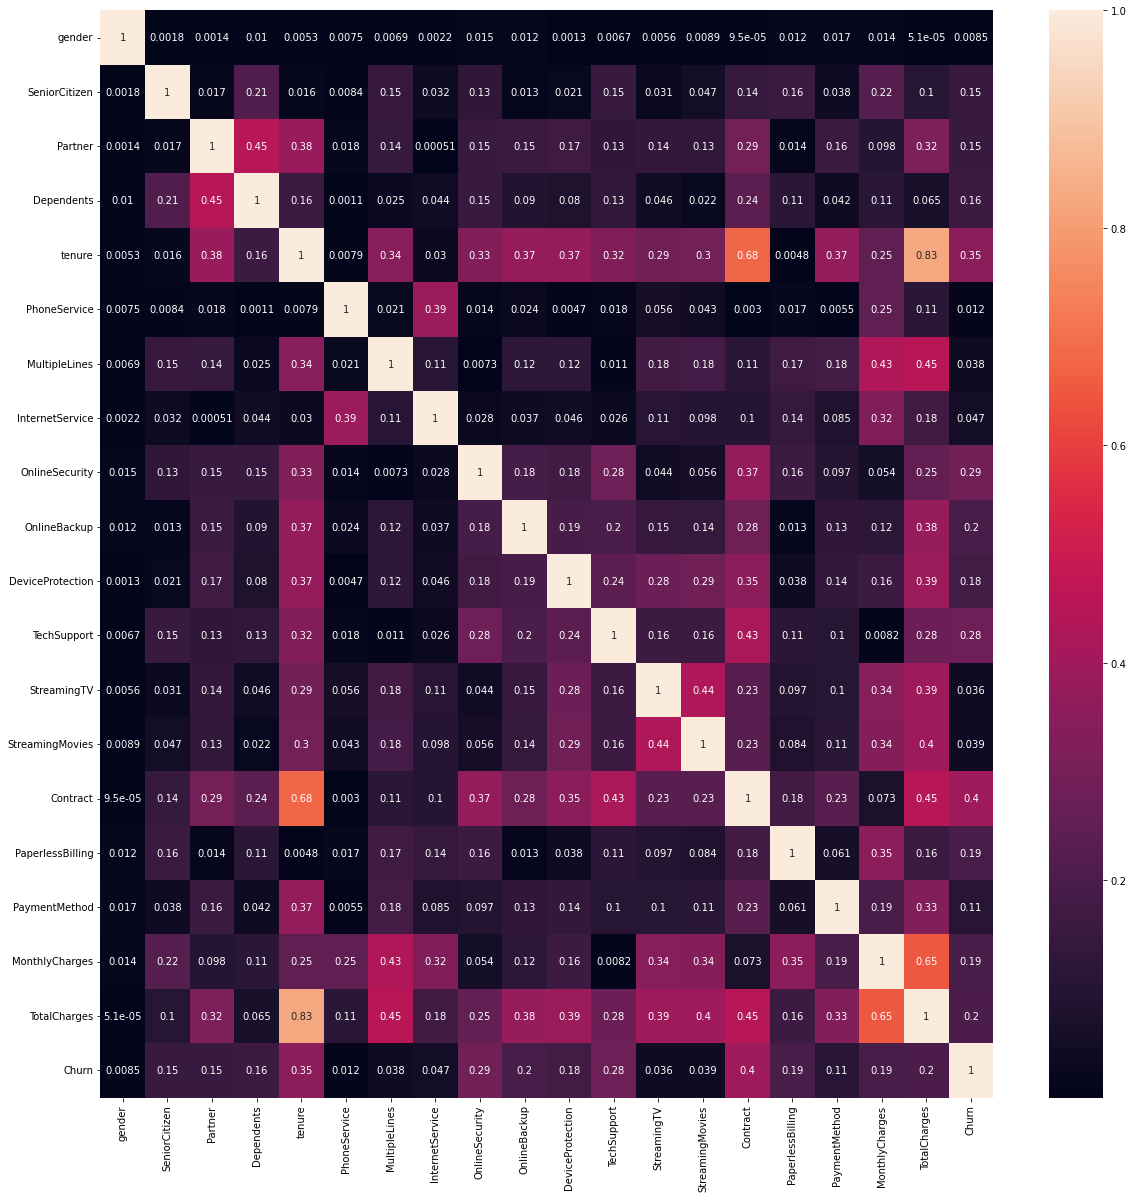

In [37]:
corr = abs(df.corr())
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

Analysis of the HeatMap (correlation Map):

* Correlation between target (Churn) and independent variables \
    We can see the independent variables (gender, phoneService, MultipleLines, InternetService, StreamingTV, StreamingMovies, PaymentMethod) have a correlation value < 0.15 when compared to Churn.
    This implies that we cannot directly uses these variables for prediction using linear regression, but we can definitely use multiple regression, decision tree etc

* Correlation between the independent variables \
    We can see that between the independent variables, the pairs (Contract, Tenure), (TotalCharges, Tenure) and (MonthlyCharges, TotalCharges) have very high correlation values. This significant intercorrelation can cause multicollinearity problems.

Determining which records contribute more towards Churn:

* Correlations of Contract, TotalCharges, and MonthlyCharges, Tenure vs Churn 
    >Contract -> 0.68 \
    TotalCharges -> 0.83 \
    MonthlyCharges -> 0.25 \
    Tenure -> 0.35 

    We could drop MonthlyCharges and Tenure in favour of TotalCharges and MonthlyCharges as the laters have higher correlation with the Target variable. Doing so would remove multicollinearity problems.


Determining outliers in Continuos variables

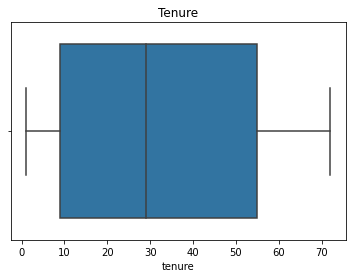

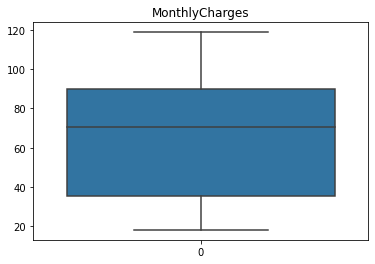

<AxesSubplot:title={'center':'TotalCharges'}>

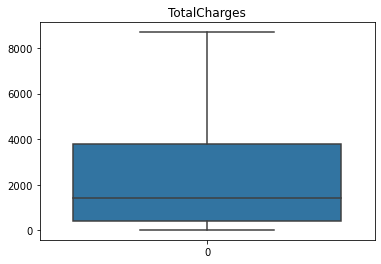

In [38]:
plt.title("Tenure")
sns.boxplot(data=df, x=df['tenure'])
plt.show()

plt.title("MonthlyCharges")
sns.boxplot(data=df['MonthlyCharges'])
plt.show()

plt.title("TotalCharges")
sns.boxplot(data=df['TotalCharges'])

There is no outliers in the continuous variables.

View continuous variables in a histogram to determine if scaling should be used.

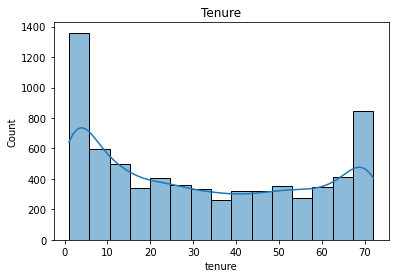

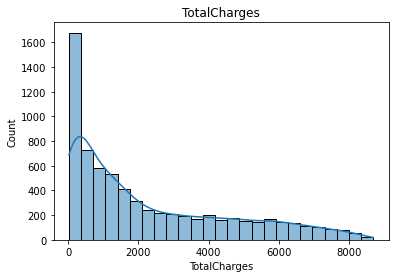

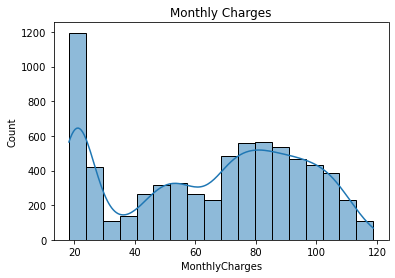

In [39]:
plt.title('Tenure')
sns.histplot(data=df, x=df['tenure'], kde=True)
plt.show()

plt.title('TotalCharges')
sns.histplot(data=df, x=df['TotalCharges'], kde=True)
plt.show()

plt.title('Monthly Charges')
sns.histplot(data=df, x=df['MonthlyCharges'], kde=True)
plt.show()

Inferences
> None of the continuos variables match normal distribution.
> The second graph (i.e TotalCharges) can be scaled using min max scaling as the data should a continuous decreasing trend.
> The third graph (i.e MonthlyCharges) varies on a random basis.


In [40]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.84375,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1890.00000,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.12500,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1841.00000,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.62500,1


In [41]:
# Train and Test split
from sklearn.model_selection import train_test_split as tts 
traindf, testdf = tts(df,test_size=0.2,random_state=42)
print(f"The dimensions of train data frame is {traindf.shape} and test data frame is {testdf.shape}")

The dimensions of train data frame is (5625, 20) and test data frame is (1407, 20)


In [42]:
df.dtypes

gender                 int8
SeniorCitizen          int8
Partner                int8
Dependents             int8
tenure                int64
PhoneService           int8
MultipleLines          int8
InternetService        int8
OnlineSecurity         int8
OnlineBackup           int8
DeviceProtection       int8
TechSupport            int8
StreamingTV            int8
StreamingMovies        int8
Contract               int8
PaperlessBilling       int8
PaymentMethod          int8
MonthlyCharges      float64
TotalCharges        float16
Churn                 int64
dtype: object

In [43]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.84375,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1890.00000,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.12500,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1841.00000,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.62500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.00000,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7364.00000,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.50000,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.50000,1


## Review 2 starts here

<b> Setting up the dataset </b>
<ul>
<li> Removing the class imbalance over random samples beign generated. 
<li> Dropping TotalCharges as it has high correlation between Monthly charges and Tenure
</ol>


In [44]:
df.drop('TotalCharges',axis=1 ,inplace=True)
X = df.iloc[:,:-1]
y = df['Churn']
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
x_train, x_test, y_train, y_test = tts(X,y,test_size=0.2)

<b> Simple candidate model </b>

1. Decision Tree

In [45]:
# DT
from sklearn.metrics import accuracy_score
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred_DT = clf.predict(x_test)
print(accuracy_score(y_test, y_pred_DT))

0.8620522749273959


2. K-Nearest Neighbours

In [46]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
y_pred_KNN = model.predict(x_test)
print(accuracy_score(y_test, y_pred_KNN))

0.7841239109390126


3. Support Vector Machines

In [47]:
# SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)
y_pred_SVM = clf.predict(x_test)
print(accuracy_score(y_test, y_pred_SVM))

0.8121974830590513


4. Gaussian Naive Bayes

In [48]:
# GNB
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred_GNB = clf.predict(x_test)
print(accuracy_score(y_test, y_pred_GNB))

0.7516940948693127


5. Multi Layer Perceptron

In [49]:
# MLP
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)
y_pred_MLP = clf.predict(x_test)
print(accuracy_score(y_test, y_pred_MLP))

0.7618586640851888


6. Logistic Regression

In [50]:
# Logisitic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_pred_LOG = clf.predict(x_test)
print("LogReg: ",accuracy_score(y_test, y_pred_LOG))

LogReg:  0.760406582768635


<b> Make dataframe of predictions

In [51]:
pred_df = pd.DataFrame(list(zip(y_pred_DT, y_pred_KNN, y_pred_SVM, y_pred_GNB, y_pred_MLP, y_pred_LOG, y_test)), columns=['DT','KNN','SVM','GNB', 'MLP','LOG_REG','Test'])
pred_df

,DT,KNN,SVM,GNB,MLP,LOG_REG,Test
0,0,0,0,0,0,0,0
1,1,1,1,0,1,1,1
2,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2061,1,1,1,1,1,1,0
2062,1,1,0,0,1,1,0
2063,1,1,0,1,1,1,0
2064,1,1,1,1,1,1,1


<b> Simple ensembling techniques </b>
<ol>
<li> Max voting
<li> Averaging 
<li> Weighted averaging
</ol>
<i> Since churn prediction is a classification problem the last two are not applicable as they are meant for regression. Only max voting is applicable among the list of simple ensembling techniques

<b> 1. Max voting

In [52]:
y_pred_MAX = np.zeros(y_test.shape[0])
for i in range(y_pred_MAX.shape[0]):
    y_pred_MAX[i] = pred_df.iloc[i,:].mode()
accuracy_score(y_test, y_pred_MAX)

0.8175217812197483

<b> Advanced Ensemble Techniques </b>
<ol>
<li> Stacking 
<li> Bagging
<li> Boosting
</ol>

<i> The outputs from the above 6 candidate models will be used as input for a new meta learner. The output of the meta learner is the one compared and validated using an accuracy score.

<b>1. Stacking

In [53]:
X = pred_df.iloc[:,:-1]
y = pred_df['Test']
meta_x_train, meta_x_test, meta_y_train, meta_y_test = tts(X,y,test_size=0.2)
print(meta_x_train.shape)
print(meta_y_train.shape)
print(meta_x_test.shape)
print(meta_y_test.shape)

(1652, 6)
(1652,)
(414, 6)
(414,)


<b>List of meta learners used </b>
<ol>
<li>KNN
<li>DT
<li>SVM
<li>GNB
<li>ADABOOST
<li>BAGGING
<li>MLP
<li>Logistic Regression
</ol>

In [54]:
# KNN
knn_lis = []
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(meta_x_train, meta_y_train)
y_pred_1 = model.predict(meta_x_test)
knn_lis.append(accuracy_score(meta_y_test, y_pred_1)*100)
# DT
dt_lis = []
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(meta_x_train, meta_y_train)
y_pred_2 = clf.predict(meta_x_test)
dt_lis.append(accuracy_score(meta_y_test, y_pred_2)*100)
# SVM
svm_lis = []
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(meta_x_train, meta_y_train)
y_pred_3 = clf.predict(meta_x_test)
svm_lis.append(accuracy_score(meta_y_test, y_pred_3)*100)
# GNB
gnb_lis = []
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(meta_x_train, meta_y_train)
y_pred_4 = clf.predict(meta_x_test)
gnb_lis.append(accuracy_score(meta_y_test, y_pred_4)*100)
# AdaBoost
ada_lis = []
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(meta_x_train, meta_y_train)
y_pred_5 = clf.predict(meta_x_test)
ada_lis.append(accuracy_score(meta_y_test, y_pred_5)*100)
# Bagging classifier
bag_lis = []
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=10, random_state=0).fit(meta_x_train, meta_y_train)
y_pred_6 = clf.predict(meta_x_test)
bag_lis.append(accuracy_score(meta_y_test, y_pred_6)*100)

# MLP
mlp_lis = []
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(meta_x_train, meta_y_train)
y_pred_7 = clf.predict(meta_x_test)
mlp_lis.append(accuracy_score(meta_y_test, y_pred_7)*100)

# Logisitic Regression
log_lis = []
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(meta_x_train, meta_y_train)
y_pred_8 = clf.predict(meta_x_test)
log_lis.append(accuracy_score(meta_y_test, y_pred_8)*100)

ens_res = pd.DataFrame(list(list(zip(knn_lis, dt_lis, svm_lis, gnb_lis, ada_lis, bag_lis, mlp_lis, log_lis))[0]), columns=['Accuracy'],index=['KNN','DT', 'SVM','GNB', 'ADABOOST','BAGGING','MLP','LOG_REG'])
ens_res

,Accuracy
KNN,56.280193
DT,87.681159
SVM,87.681159
GNB,82.125604
ADABOOST,87.198068
BAGGING,86.956522
MLP,87.681159
LOG_REG,87.198068


In [55]:
acc = float(ens_res['Accuracy'].max())
max_ind = list(ens_res.idxmax())[0]
print(f"Max accuracy from stacking is {round(acc,3)}% with meta learner {max_ind}")

Max accuracy from stacking is 87.681% with meta learner DT


<b>2. Bagging </b>
<ol>
<li> Random forest
<li> Bagging classifier
<li> Bagging meta-estimator
</ol>

<b> 2.1 Random forest

Random Forest Classifier with 100 n_estimators and 'gini' criterion gives an accuracy of 89.303%


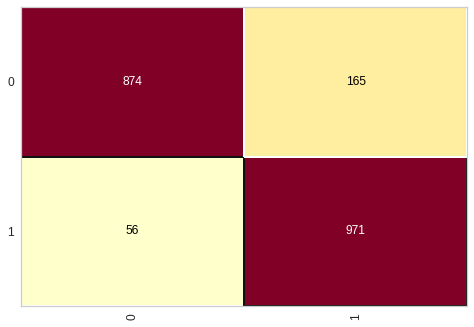

In [56]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
random_forest.fit(x_train, y_train)
previsoes = random_forest.predict(x_test)
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest)
cm.fit(x_train, y_train)
print(f"Random Forest Classifier with {100} n_estimators and 'gini' criterion gives an accuracy of {round(cm.score(x_test, y_test)*100,3)}%")

<b> 2.2 Bagging classifier

In [57]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=10, random_state=0).fit(x_train, y_train)
y_pred_6 = clf.predict(x_test)
print(accuracy_score(y_test, y_pred_6))

0.7410454985479187


<b> 2.3 Bagging meta-estimator

In [86]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8823814133591481

<b>3. Boosting </b>
<ol>
<li> CatBoost
<li> Light Gradient Boost Machine
<li> AdaBoost
<li> Gradient Boost Machine
<ol>

<b> 3.1 CatBoost

In [58]:
import catboost as ctb
model_ctb = ctb.CatBoostClassifier()
model_ctb.fit(x_train, y_train)
expected_y = y_test 
predicted_y = model_ctb.predict(x_test)
from sklearn import metrics
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))
print(f"CatBoost method of Boosting gives an accuracy of {round(metrics.accuracy_score(expected_y, predicted_y)*100,3)}%")

Learning rate set to 0.02538
0:	learn: 0.6805377	total: 51.4ms	remaining: 51.3s
1:	learn: 0.6709790	total: 54.2ms	remaining: 27s
2:	learn: 0.6614434	total: 56.5ms	remaining: 18.8s
3:	learn: 0.6521609	total: 59.9ms	remaining: 14.9s
4:	learn: 0.6416714	total: 62.3ms	remaining: 12.4s
5:	learn: 0.6327831	total: 65ms	remaining: 10.8s
6:	learn: 0.6236955	total: 67.4ms	remaining: 9.56s
7:	learn: 0.6166593	total: 69.6ms	remaining: 8.63s
8:	learn: 0.6100387	total: 72.7ms	remaining: 8.01s
9:	learn: 0.6035170	total: 74.9ms	remaining: 7.41s
10:	learn: 0.5969653	total: 77.6ms	remaining: 6.98s
11:	learn: 0.5906972	total: 79.7ms	remaining: 6.56s
12:	learn: 0.5846493	total: 82ms	remaining: 6.23s
13:	learn: 0.5792760	total: 86.4ms	remaining: 6.08s
14:	learn: 0.5740600	total: 88.9ms	remaining: 5.84s
15:	learn: 0.5688799	total: 91.8ms	remaining: 5.65s
16:	learn: 0.5639272	total: 94.3ms	remaining: 5.45s
17:	learn: 0.5599677	total: 97.4ms	remaining: 5.31s
18:	learn: 0.5557813	total: 99.4ms	remaining: 5.13s

<b> 3.2 Light Gradient Boost Machine

In [59]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(f"LGBM method of Boosting gives an accuracy of {round(metrics.accuracy_score(y_test, y_pred)*100,3)}%")

LGBM method of Boosting gives an accuracy of 82.962%


<b> 3.3 AdaBoost

In [60]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
y_pred_5 = clf.predict(x_test)
print(f"AdaBoost method of Boosting gives an accuracy of {round(metrics.accuracy_score(y_test, y_pred_5)*100,3)}%")

AdaBoost method of Boosting gives an accuracy of 76.137%


<b> 3.4 Gradient Boost Machine

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
print(f"AdaBoost method of Boosting gives an accuracy of {round(model.score(x_test,y_test)*100,3)}%")

AdaBoost method of Boosting gives an accuracy of 75.944%


## Improvements using GridSearchCV

<b> Logistic Regression using GridSearchCV

In [89]:
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds
clf.fit(x_train,y_train)
print("Accuracy :",clf.best_score_)        

Accuracy : 0.7605326876513316


In [61]:
from sklearn.model_selection import GridSearchCV
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

In [62]:
model = tree.DecisionTreeClassifier()

In [63]:
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)

In [64]:
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridDecisionTree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [65]:
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  3
Max Nvl:  11
Algorithm:  gini
Score:  0.8010895883777239


<b> Random Forest using Grid Search CV

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
n_estimators = np.array([100])
alg = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': alg}

In [68]:
model = RandomForestClassifier()

In [69]:
gridRandomForest = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)

In [70]:
gridRandomForest.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([100])})

In [71]:
print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)

Algorithm:  entropy
Score:  0.8753026634382566


In [72]:
random_forest = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)

In [73]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [74]:
previsoes = random_forest.predict(x_test)

0.8930300096805421

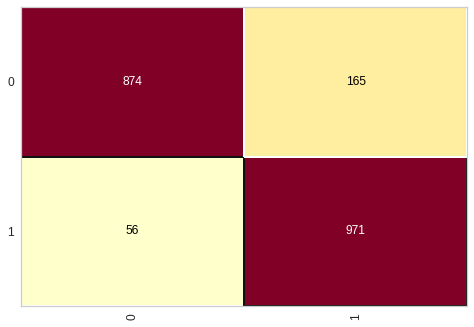

In [75]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

<b> AutoKeras

In [77]:
import autokeras as ak

2023-01-01 16:46:37.754360: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-01 16:46:40.819375: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-01 16:46:40.819439: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-01 16:46:41.139225: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-01 16:47:00.073587: W tensorflow/stream_executor/platform/de

In [78]:
clf = ak.StructuredDataClassifier(max_trials=10,seed=1234)
# Feed the structured data classifier with training data.
clf.fit(x_train, y_train, epochs=50, validation_split=0.2)
# Predict with the best model.
predicted_y = clf.predict(x_test)
# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

INFO:tensorflow:Reloading Oracle from existing project ./structured_data_classifier/oracle.json
INFO:tensorflow:Reloading Tuner from ./structured_data_classifier/tuner0.json


2023-01-01 16:47:31.298703: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-01 16:47:31.298771: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (minato-lap): /proc/driver/nvidia/version does not exist
2023-01-01 16:47:31.300100: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


INFO:tensorflow:Oracle triggered exit
Epoch 1/50
259/259 [==============================] - 2s 4ms/step - loss: 0.6824 - accuracy: 0.5550
Epoch 2/50
259/259 [==============================] - 1s 3ms/step - loss: 0.5418 - accuracy: 0.7438
Epoch 3/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4945 - accuracy: 0.7564
Epoch 4/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4835 - accuracy: 0.7626
Epoch 5/50
259/259 [==============================] - 1s 4ms/step - loss: 0.4765 - accuracy: 0.7676
Epoch 6/50
259/259 [==============================] - 1s 4ms/step - loss: 0.4695 - accuracy: 0.7708
Epoch 7/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4632 - accuracy: 0.7746
Epoch 8/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4575 - accuracy: 0.7781
Epoch 9/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4521 - accuracy: 0.7793
Epoch 10/50
259/259 [==============================] - 1s 3ms/

In [79]:
predicted = clf.predict(x_test)

65/65 [==============================] - 0s 4ms/step


In [80]:
from sklearn.metrics import classification_report
print("classification report for neural network")
print(classification_report(predicted,y_test))

classification report for neural network
              precision    recall  f1-score   support

         0.0       0.74      0.81      0.78       950
         1.0       0.83      0.76      0.79      1116

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



<b> ANN

In [81]:
import tensorflow as tf

In [82]:
x_train.shape[1]

18

In [83]:
inputs = tf.keras.Input(shape=(x_train.shape[1],))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu', input_dim=x_train.shape[1]))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=40, batch_size=10, validation_split=0.2)

test_score = model.evaluate(x_test, y_test, verbose=2)
print("Test loss: ", test_score[0])
print("Test accuracy: ", test_score[1])
model.summary()

Epoch 1/40
661/661 [==============================] - 2s 3ms/step - loss: 0.5723 - accuracy: 0.7303 - val_loss: 0.5303 - val_accuracy: 0.7512
Epoch 2/40
661/661 [==============================] - 2s 2ms/step - loss: 0.5185 - accuracy: 0.7468 - val_loss: 0.5700 - val_accuracy: 0.7331
Epoch 3/40
661/661 [==============================] - 2s 3ms/step - loss: 0.5129 - accuracy: 0.7545 - val_loss: 0.4899 - val_accuracy: 0.7657
Epoch 4/40
661/661 [==============================] - 2s 4ms/step - loss: 0.5082 - accuracy: 0.7514 - val_loss: 0.4994 - val_accuracy: 0.7458
Epoch 5/40
661/661 [==============================] - 2s 3ms/step - loss: 0.5137 - accuracy: 0.7502 - val_loss: 0.4884 - val_accuracy: 0.7615
Epoch 6/40
661/661 [==============================] - 2s 2ms/step - loss: 0.5126 - accuracy: 0.7539 - val_loss: 0.5178 - val_accuracy: 0.7337
Epoch 7/40
661/661 [==============================] - 1s 2ms/step - loss: 0.4977 - accuracy: 0.7529 - val_loss: 0.4907 - val_accuracy: 0.7579
Epoch 

In [84]:
print("Test loss: ", test_score[0])
print("Test accuracy: ", test_score[1])

Test loss:  0.488041490316391
Test accuracy:  0.7555662989616394


Check list
1. Grid search is giving poor preds, try making it work or throw it away
2. Add concepts, architecture diagrams and type about each type of model employed